In [1]:
### This script will display the network in its entirety. 
### If you want you can enable physics for drawing the network
### and display the physics buttons to find a good visualization.
### If you want to visualize a local region of the network you 
### can use the third script.

from pyvis.network import Network
from pathlib import Path
import networkx as nx
import time

t = time.time()
folder = Path()

power_grid_gml_file = folder / "powergrid.gml"

### Read the gml file as a graph
power_grid_graph = nx.read_gml(power_grid_gml_file)

### Create a pyvis network from the graph
power_grid_network = Network("800px", width="100%", bgcolor="#222222", font_color="white", \
                        heading="Powergrid Network")
power_grid_network.from_nx(power_grid_graph)

### Manipulate note attributes for display purposes
for node in power_grid_network.nodes:
    ### We first set the size of the node to be equal to its degree
    node["size"] = power_grid_graph.degree[node["id"]]
    
    ### We then set the title to be the name of the person in bold
    node["title"] = "<b>" + node["id"] + "</b>"
    
### Comment the next line to enable the physics for drawing the graph
power_grid_network.toggle_physics(False)

### You can control the physics in the output page by uncommenting the next line
### By switching of the "Physics Enabled" box the nodes will stop moving
#power_grid_network.show_buttons(filter_=['physics'])

power_grid_network.show("power_grid.html")

In [2]:
import random as rnd

def compute_local_neighborhood(G,node,size):
    if (node not in G.nodes):
        idx = int(rnd.uniform(0, len(G.nodes)))
        node = list(G.nodes)[idx]
    
    if (size <= 0):
        size = 2
        
    local_graph = nx.Graph()
    
    
    current_size = 0
    
    current_neighborhood = set()
    next_neighborhood = set()
    
    current_neighborhood.add(node)
    
    while current_size < size:
        current_size += 1
        for node in current_neighborhood:
            neighbors = G.adj[node]
            local_graph.add_node(node)
            for neighbor in neighbors:
                local_graph.add_edge(node,neighbor)
                next_neighborhood.add(neighbor)
        
        current_neighborhood = next_neighborhood.copy()
        next_neighborhood = set()
        
    
    return local_graph

In [3]:
### This script will draw a subnetwork of the entire network. For this
### it will take a node [root_node] and look at the neighborhood up to
### size [size_of_neighborhood]. If this size is 1, it will only show
### the neighbors. For size 2 it will also show all the neighbors of the
### neighbors. And so on. If no root_node is specified a random node will
### be selected that has degree > 0.
### NOTE: do not forget to run the script above so that the function
### compute_local_neighborhood is defined.

from pyvis.network import Network
from pathlib import Path
import networkx as nx
import random as rnd

root_node = -1
size_of_neighborhood = 5

folder = Path()

power_grid_gml_file = folder / "powergrid.gml"

### Read the gml file as a graph
power_grid_graph = nx.read_gml(power_grid_gml_file)

### If the specified root is not in the graph we select a node with
### degree > 0 at random
if (root_node not in power_grid_graph.nodes):
    idx = int(rnd.uniform(0, len(power_grid_graph.nodes)))
    root_node = list(power_grid_graph.nodes)[idx]
    while (power_grid_graph.degree[root_node] <= 0):
        idx = int(rnd.uniform(0, len(power_grid_graph.nodes)))
        root_node = list(power_grid_graph.nodes)[idx]

heading = f"Powergrid Network, Local view from: {root_node} of size {size_of_neighborhood}"

small_power_grid_graph = compute_local_neighborhood(power_grid_graph,root_node,size_of_neighborhood)

### Create a pyvis network from the graph
small_power_grid_network = Network("800px", width="100%", bgcolor="#222222", font_color="white", \
                           heading=heading)
small_power_grid_network.from_nx(small_power_grid_graph)

### Manipulate note attributes for display purposes
for node in small_power_grid_network.nodes:
    if (node["id"] == root_node):
        node.update({'x':0, 'y':0, 'color':'red'})
        node["size"] = 20
    else:
        node["size"] = 10

    ### We set the title to be the name of the node in bold
    node["title"] = "<b>" + node["label"] + "</b>"
    
    ### Finally we set the label property to display the id of the node
    node["label"] = node["id"]
    
### Comment the next line to enable the physics for drawing the graph
small_power_grid_network.toggle_physics(False)

### You can control the physics in the output page by uncommenting the next line
### By switching of the "Physics Enabled" box the nodes will stop moving
#small_power_grid_network.show_buttons(filter_=['physics'])

small_power_grid_network.show("power_grid_local.html")

# Assignment 2 #

### Computing the average degree ###

In [4]:
degree_sequence = [degree for node, degree in power_grid_graph.degree()]
average_degree = sum(degree_sequence)/len(degree_sequence)
print(f'The average degree is {average_degree}.')

The average degree is 2.66909532483303.


### Computing the average clustering ###

In [5]:
average_clustering = nx.average_clustering(power_grid_graph)
print(f'The average clustering is {average_clustering}.')

The average clustering is 0.08010361108159711.


### Computing the average distance ###

In [6]:
average_distance = nx.average_shortest_path_length(power_grid_graph)
print(f'The average distance is {average_distance}.')

The average distance is 18.989185424445708.


### Computing the diameter ###

In [7]:
diameter = nx.diameter(power_grid_graph)
print(f'The diameter is {diameter}.')

The diameter is 46.


# Assignment 3#
compute the degree distribution, second moment and third moment

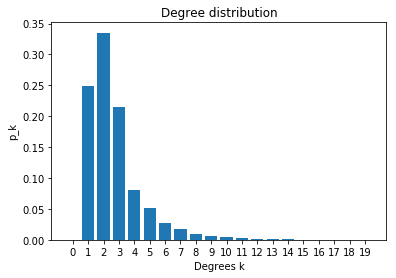

second degree is 10.332726168791742
third degree is 57.29326047358834


In [15]:
import matplotlib.pyplot as plt
import numpy as np

degree_sequence = [degree for node, degree in power_grid_graph.degree()]

max_degree = max(degree_sequence)
degree_density = [0]*(max_degree+1)


for degree in degree_sequence:
    degree_density[degree] += 1/len(power_grid_graph)



x = np.arange(max_degree+2)
density, bin_edges = np.histogram(degree_sequence,bins=x,density=True)



plt.bar(x[:-1],density)
plt.xticks(x[:-1])
plt.title('Degree distribution')
plt.xlabel('Degrees k')
plt.ylabel('p_k')
plt.show()


s2 = 0
for node in power_grid_graph.nodes:
    s2 += power_grid_graph.degree[node] ** 2
print(f"second degree is {s2/len(power_grid_graph)}")
second_degree = s2/len(power_grid_graph)
s = 0
for node in power_grid_graph.nodes:
    s += power_grid_graph.degree[node] ** 3
print(f"third degree is {s/len(power_grid_graph)}")


# Assignment 4#
compute the degree distibution for 100 random nodes

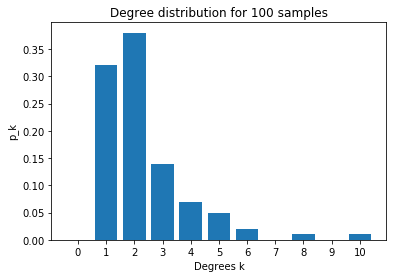

The average distance is 19.044444444444444.


In [9]:
list_power_grid = list(power_grid_graph)
sample_power_grid = rnd.sample(list_power_grid, k=100)

sample_degree_sequence = [degree for node, degree in power_grid_graph.degree(sample_power_grid)]


sample_max_degree = max(sample_degree_sequence)
sample_degree_density = [0]*(max_degree+1)

for degree in sample_degree_sequence:
    sample_degree_density[degree] += 1/len(power_grid_graph)



x = np.arange(sample_max_degree+2)
density, bin_edges = np.histogram(sample_degree_sequence,bins=x,density=True)



plt.bar(x[:-1],density)
plt.xticks(x[:-1])
plt.title('Degree distribution for 100 samples')
plt.xlabel('Degrees k')
plt.ylabel('p_k')
plt.show()


#this is probably a really shitty algorithm nut  i can't find a nice NetworkX function that does the same 
#so this is a nested loop that runs dijkstra's algorithm 100000 times
sample_sum_distance = 0
for i in range(0,100):
    for j in range(0,100):
        sample_sum_distance += nx.shortest_path_length(power_grid_graph, source=sample_power_grid[i], target=sample_power_grid[j])

sample_average_distance = sample_sum_distance /((len(sample_power_grid)-1)*len(sample_power_grid))
print(f'The average distance is {sample_average_distance}.')


# Assignment 5#
describe the structure of the network

# Assignment 6#
make a random network and calculate it's characteristics

In [10]:


random_network = nx.configuration_model(degree_sequence)

rnd_degree_sequence = [degree for node, degree in random_network.degree()]
rnd_average_degree = sum(degree_sequence)/len(degree_sequence)
print(f'The average degree is {rnd_average_degree}.')

component_index = 0
for c in nx.connected_components(random_network):
    component_index += 1
    connected_subgraph = random_network.subgraph(c).copy()
    rnd_diameter = nx.diameter(connected_subgraph)
    #rnd_average_distance = nx.average_shortest_path_length(connected_subgraph)
    #rnd_average_clustering = nx.average_clustering(connected_subgraph)
    print(f"The diameter of component {component_index} is {rnd_diameter}")



The average degree is 2.66909532483303.
The diameter of component 1 is 24
The diameter of component 2 is 1
The diameter of component 3 is 2
The diameter of component 4 is 1
The diameter of component 5 is 1
The diameter of component 6 is 2
The diameter of component 7 is 2
The diameter of component 8 is 4
The diameter of component 9 is 1
The diameter of component 10 is 2
The diameter of component 11 is 1
The diameter of component 12 is 2
The diameter of component 13 is 1
The diameter of component 14 is 2
The diameter of component 15 is 1
The diameter of component 16 is 2
The diameter of component 17 is 1
The diameter of component 18 is 1
The diameter of component 19 is 1
The diameter of component 20 is 1
The diameter of component 21 is 1
The diameter of component 22 is 6
The diameter of component 23 is 1
The diameter of component 24 is 4
The diameter of component 25 is 1
The diameter of component 26 is 2
The diameter of component 27 is 1
The diameter of component 28 is 1
The diameter of 

In [11]:


component_index = 0
for c in nx.connected_components(random_network):
    component_index += 1
    connected_subgraph = random_network.subgraph(c).copy()
    rnd_average_distance = nx.average_shortest_path_length(connected_subgraph)
   
    print(f"The average distance of component {component_index} is {rnd_average_distance}")
    
    elapsed = time.time() - t

print(f"total elapesed time:{elapsed}")

The average distance of component 1 is 8.511800282575075
The average distance of component 2 is 1.0
The average distance of component 3 is 1.3333333333333333
The average distance of component 4 is 1.0
The average distance of component 5 is 1.0
The average distance of component 6 is 1.3333333333333333
The average distance of component 7 is 1.3333333333333333
The average distance of component 8 is 2.0
The average distance of component 9 is 1.0
The average distance of component 10 is 1.3333333333333333
The average distance of component 11 is 1.0
The average distance of component 12 is 1.5
The average distance of component 13 is 1.0
The average distance of component 14 is 1.3333333333333333
The average distance of component 15 is 1.0
The average distance of component 16 is 1.3333333333333333
The average distance of component 17 is 1.0
The average distance of component 18 is 1.0
The average distance of component 19 is 1.0
The average distance of component 20 is 1.0
The average distance of c

In [12]:
rnd_clustering = nx.clustering(random_network)

NetworkXNotImplemented: not implemented for multigraph type

# Assignment  7#
compute the epidemic threshold of your network of for the SIS and
SIR infection models. What does this information tell you about the behavior of
infection spreading on your network

In [22]:
#As calculated in earier assignments
gamma_sis = average_degree/second_degree

gamma_sir = average_degree/(second_degree-average_degree)

print(f'gamma_sis is equal to {gamma_sis}')
print(f'gamma_sir is equal to {gamma_sir}')

gamma_sis is equal to 0.25831472558467505
gamma_sir is equal to 0.34828077959119


# Assignmnent 8

Select 5 different nodes at random in your network. For each of
these nodes, run 5 complex contagions with different values of α. For each case,
document whether there is a complete cascade or else, how large the number of
infected nodes is.4 Visualize the outcome. What does this tell you about the
structure of your network

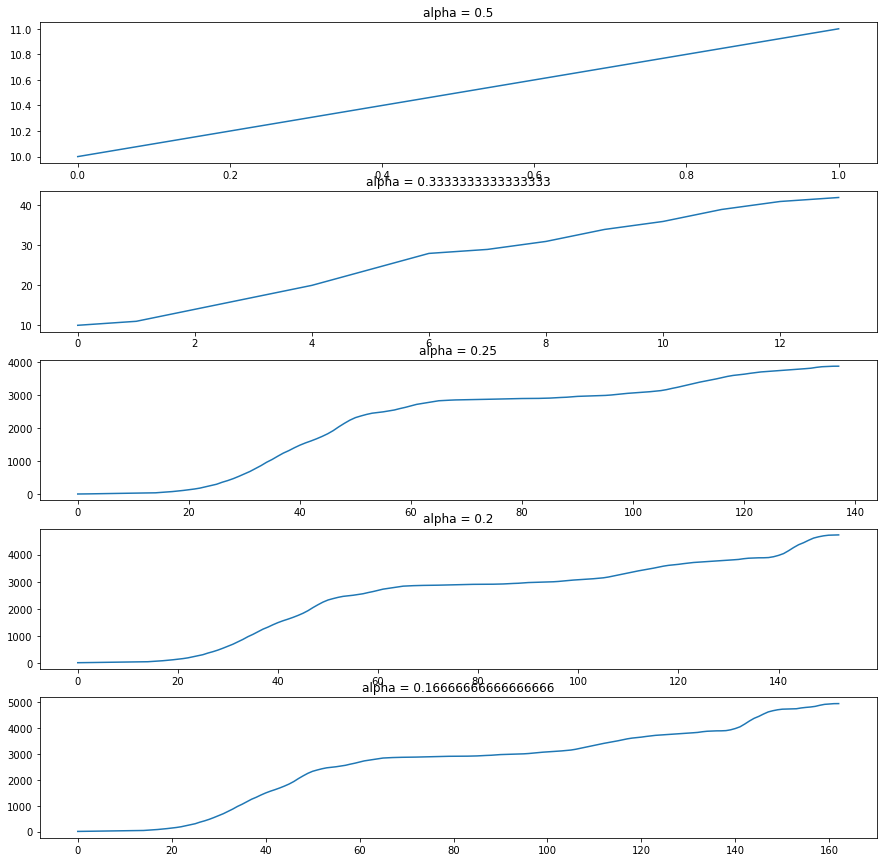

In [174]:
#set infection state for all nodes to 0
for node in power_grid_graph.nodes():
    power_grid_graph.nodes[node]['infected'] = 0
    
    


## set 5 random notes to infected state
start_node = rnd.sample(list(power_grid_graph),5)
infected_nodes = set()
for x in start_node:
    infected_nodes.add(x)
    power_grid_graph.nodes[x]['infected'] = 1




### In addition we create a list to store the nodes that are infected
### at each stage of the complex contagion process
infected_nodes_stages = []

### We need to have the size of the graph
N = power_grid_graph.number_of_nodes()


num_new_infections = len(infected_nodes)
total_infections = 1

infection_iteration = 0

### We now start running the complex contagion process. We will iteratively
### go through all infected nodes in the graph. For each non-infected 
### neighbor of an infected node, we check if the total fraction of its
### infected neighbors is larger than alpha. If so, then we update the status
### of this node to infected.
### During each iteration, we keep track of how many new nodes have become
### infected.
### The iteration ends as soon as all nodes are infected or no new nodes have
### become infected during the last round.

fig, axs = plt.subplots(5, figsize = (15,15))
for y in range (2,7):
    alpha=1/y
    while (total_infections < N) and (num_new_infections > 0):

        num_new_infections = 0
        new_infected_nodes = set()
        infection_iteration += 1

        for node in infected_nodes:

            for neighbor in power_grid_graph.adj[node]:

                if power_grid_graph.nodes[neighbor]['infected'] == 0:

                    number_infected_neighbors = 0
                    degree = power_grid_graph.degree[neighbor]

                    for second_neighbor in power_grid_graph.adj[neighbor]:
                        if power_grid_graph.nodes[second_neighbor]['infected'] == 1:
                            number_infected_neighbors += 1

                    if number_infected_neighbors/degree >= alpha:

                        power_grid_graph.nodes[neighbor]['infected'] = 1
                        new_infected_nodes.add(neighbor)
                        num_new_infections += 1   
        for new_node in new_infected_nodes:
            infected_nodes.add(new_node)
        if (len(new_infected_nodes) > 0):
            infected_nodes_stages.append(new_infected_nodes)
            
    growth = [len(infected_nodes_stages[0])+5]
    for x in range(1,len(infected_nodes_stages)):      
        growth.append(len(infected_nodes_stages[x])+growth[x-1])
    total_infections = 0
    num_new_infections = 5
    axs[y-2].plot(range(0,len(growth)),growth)
    axs[y-2].set_title(f'alpha = {alpha}')
    



# Assignment 9 
Give an example of a relevant process on your network that
could be modeled as an infection processes or a complex contagion. Explain your
answer.

one could model power overload with a infection model. If one node fails all other nodes will need to carry a bigger load. thus pottentaly causing a causcading failure of multiple nodes